In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [3]:
print('GPU Unformation -', tf.test.gpu_device_name(), '\n')
!nvidia-smi

GPU Unformation - /device:GPU:0 

Tue Mar 23 02:43:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    32W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

In [4]:
import keras
keras.__version__

'2.4.3'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  9 02:39 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


In [7]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [8]:
!ls -l

total 20
drwx------ 5 root root 4096 Mar 23 02:43 drive
drwxr-xr-x 1 root root 4096 Mar 18 13:36 sample_data
drwxr-xr-x 4 root root 4096 Mar 23 02:43 test
drwxr-xr-x 4 root root 4096 Mar 23 02:43 train
drwxr-xr-x 4 root root 4096 Mar 23 02:43 validation


In [9]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# normal scaling
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# 폴더에서 데이터 추출 한 거를 scaling 메소드를 거쳐  
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), 
                                                    batch_size=20, # train 폴더에서 한번에 20개씩 뽑아내는(dog, cat에서 랜덤으로. 두 개 합이 20개)
                                                    class_mode = 'binary') 

valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150,150), 
                                                    batch_size=20,
                                                    class_mode='binary')

#Found 2000 images belonging to 2 classes. -> 2개 폴더에서 전부 2000장 데이터
#Found 1000 images belonging to 2 classes. -> 2개 폴더에서 전부 1000장 데이터

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator: 
  print(f'배치 데이터 크기 : {data_batch.shape}')
  print(f'배치 데이터 크기 : {labels_batch.shape}')
  break # batch_size를 20장 했으니까 20장만 추출 / x = 150*150, y = class_mode: binary

배치 데이터 크기 : (20, 150, 150, 3)
배치 데이터 크기 : (20,)


In [12]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [13]:
%%time

Hist= model.fit(train_generator, # X= size(150*150) y=개 or 고양이 (binary)
                steps_per_epoch=100, # batch_size가 20개 X 100번 돌아야  = 총 2000장 추출가능
                epochs=60,
                validation_data=valid_generator,
                validation_steps=50) # validation은 총 1000장이니까 20번씩 50번 돌면 1000장

Epoch 1/60
100/100 [==============================] - 42s 92ms/step - loss: 0.6959 - accuracy: 0.5138 - val_loss: 0.6928 - val_accuracy: 0.5250
Epoch 2/60
100/100 [==============================] - 9s 88ms/step - loss: 0.6935 - accuracy: 0.4889 - val_loss: 0.6895 - val_accuracy: 0.5610
Epoch 3/60
100/100 [==============================] - 9s 89ms/step - loss: 0.6882 - accuracy: 0.5529 - val_loss: 0.6852 - val_accuracy: 0.6100
Epoch 4/60
100/100 [==============================] - 9s 90ms/step - loss: 0.6624 - accuracy: 0.6098 - val_loss: 0.8357 - val_accuracy: 0.5770
Epoch 5/60
100/100 [==============================] - 9s 91ms/step - loss: 0.6701 - accuracy: 0.6305 - val_loss: 0.6758 - val_accuracy: 0.5970
Epoch 6/60
100/100 [==============================] - 9s 90ms/step - loss: 0.5973 - accuracy: 0.6682 - val_loss: 0.5951 - val_accuracy: 0.6910
Epoch 7/60
100/100 [==============================] - 9s 90ms/step - loss: 0.5658 - accuracy: 0.7005 - val_loss: 0.5725 - val_accuracy: 0.705

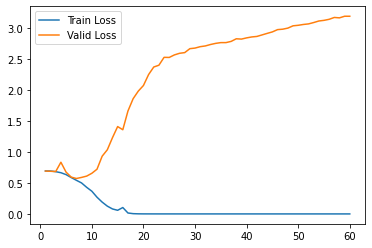

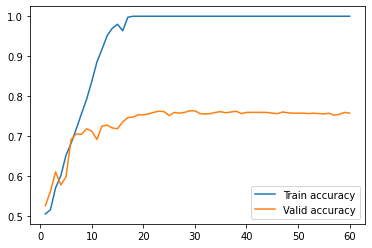

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)

plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['Train Loss','Valid Loss'])
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['Train accuracy','Valid accuracy'])
plt.show()

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='binary')

loss, accuracy = model.evaluate(test_generator, steps=50)
loss, accuracy

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 3s 54ms/step - loss: 3.5194 - accuracy: 0.7040


(3.519402265548706, 0.7039999961853027)